<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

⭐Run the following code to read in the "cardio.csv" file.

In [ ]:
df = pd.read_csv("cardio.csv", sep=";")

In [ ]:
df.head()

In [ ]:
df.info()

In [32]:
df=df.sample(500, random_state=42)

In [ ]:
df.shape

In [ ]:
df.describe()

⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [33]:
df.set_index(['id'], inplace=True)

In [34]:
df["age"] = np.round(df.age/365,2)
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
66728,59.64,1,156,64.0,140,80,2,1,0,0,1,1
69098,59.93,1,170,85.0,160,90,1,1,0,0,1,1
59185,63.75,1,151,90.0,130,80,1,1,0,0,1,1


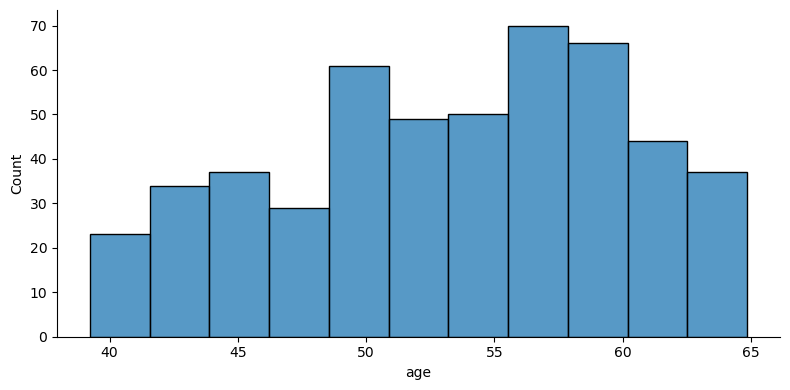

In [35]:
 sns.displot(x="age", height = 4, aspect = 2, data=df)

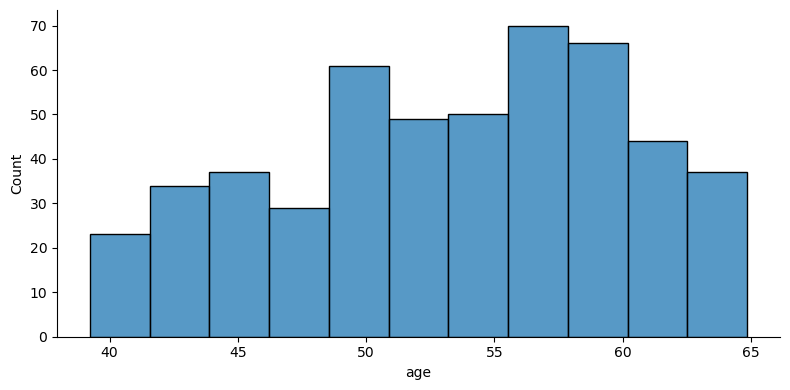

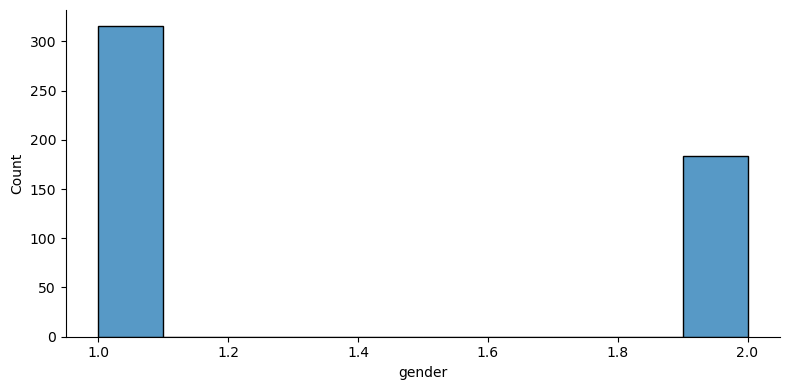

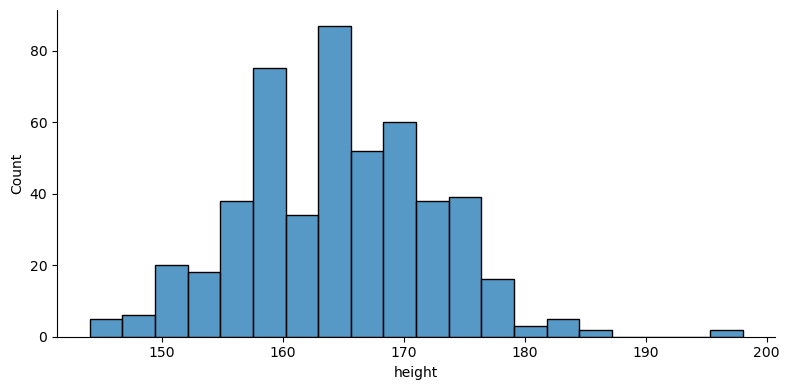

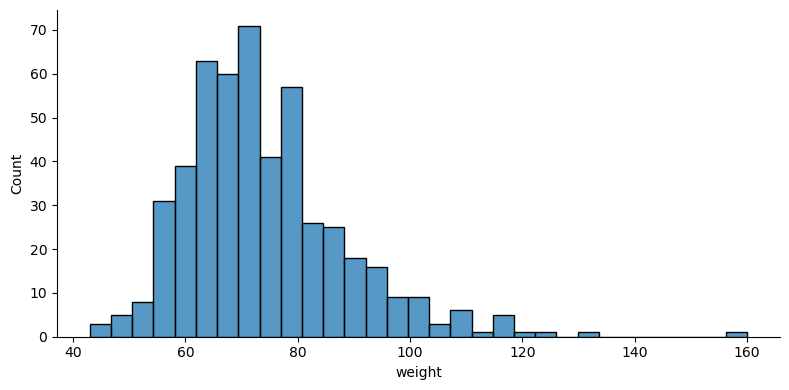

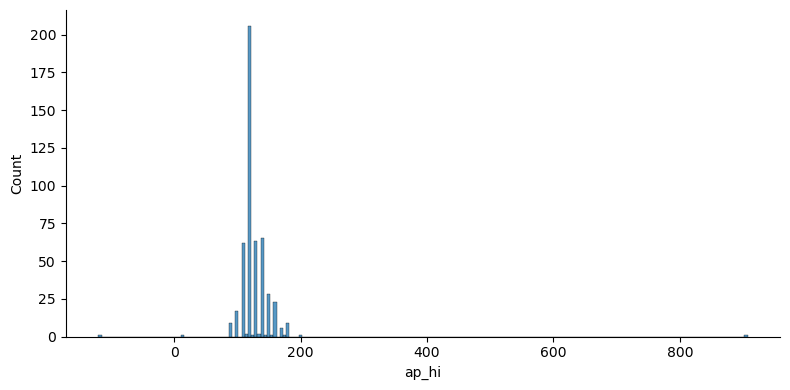

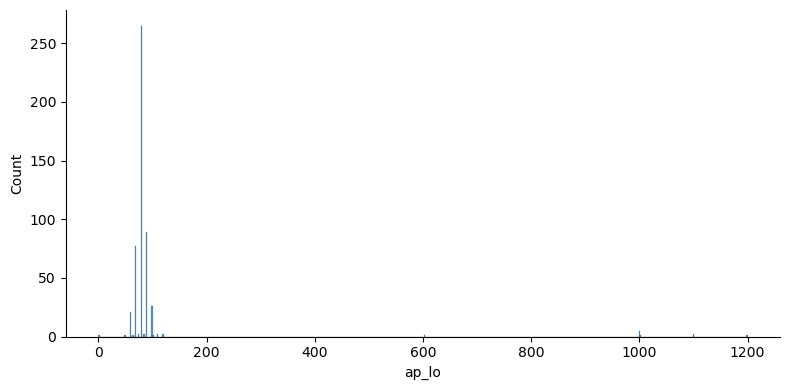

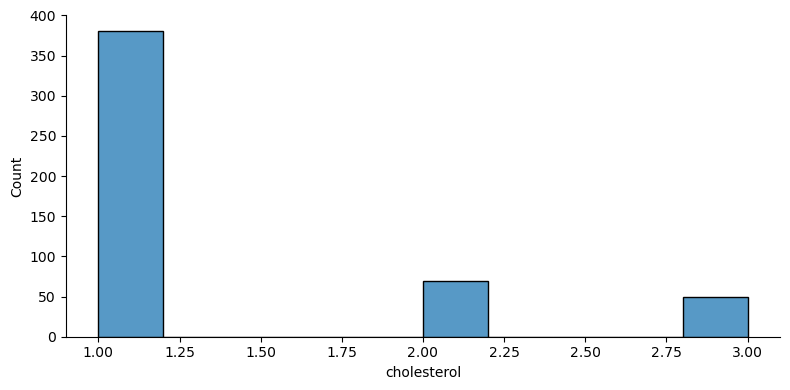

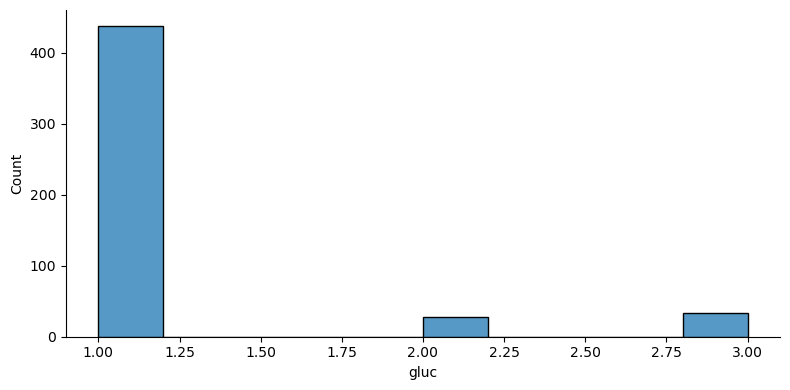

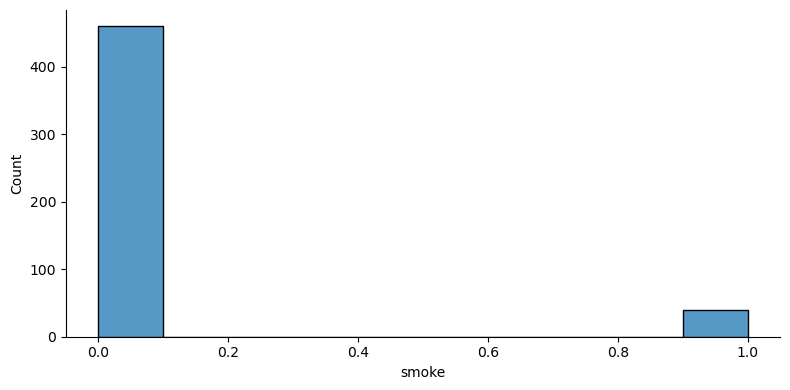

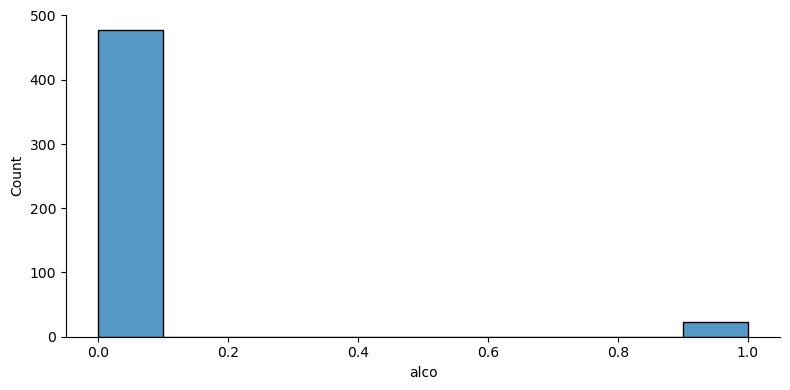

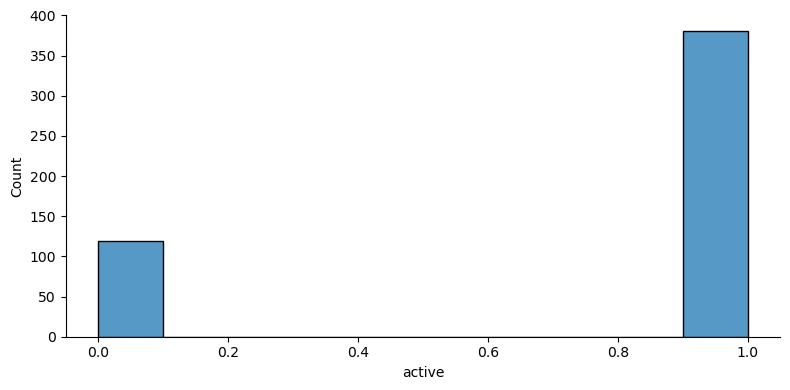

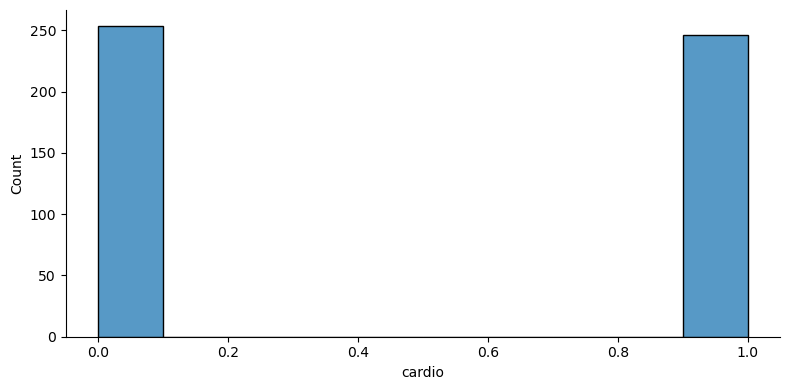

In [36]:
for col in df.columns:
  sns.displot(x=col, height = 4, aspect = 2, data=df)

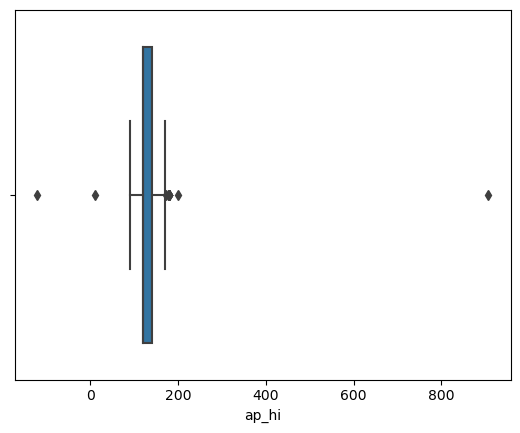

In [37]:
sns.boxplot(x="ap_hi", data=df);

In [45]:
df = df[df['ap_hi'] < 300 ]
df = df[df['ap_hi'] > 0 ]

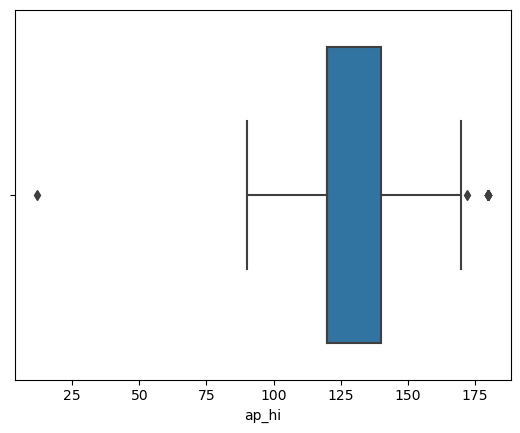

In [46]:
sns.boxplot(x="ap_hi", data=df);

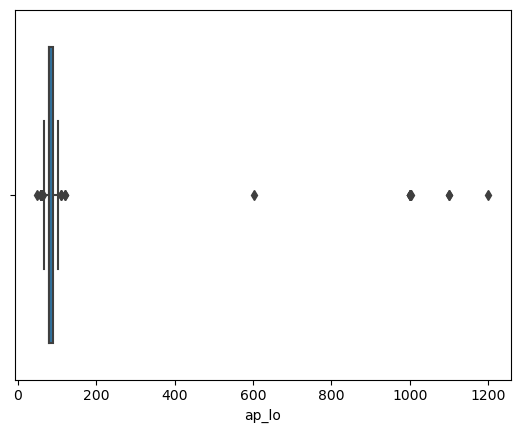

In [40]:
sns.boxplot(x="ap_lo", data=df);

In [52]:
df = df[df['ap_lo'] < 300 ]
df = df[df['ap_lo'] > 25 ]

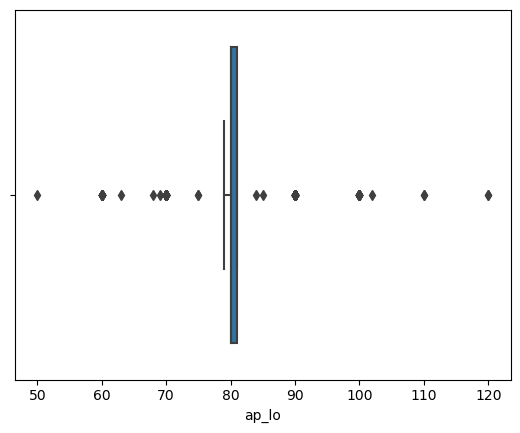

In [42]:
sns.boxplot(x="ap_lo", data=df);

In [43]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.00000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,53.361086,1.366803,164.809426,74.060861,126.288934,80.67418,1.334016,1.186475,0.077869,0.047131,0.764344,0.483607
std,6.697971,0.482427,8.025278,14.363246,17.540932,9.28769,0.648098,0.532382,0.268240,0.212137,0.424843,0.500244
min,39.230000,1.000000,144.000000,43.000000,12.000000,50.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.827500,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.895000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.492500,2.000000,170.000000,80.000000,140.000000,81.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.850000,2.000000,198.000000,160.000000,180.000000,120.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [47]:
df.ap_hi.mean()

126.2889344262295

⭐What is the std dev. for Systolic blood pressure?

In [ ]:
df.ap_hi.std()

⭐What is the standard error of the mean for Systolic blood pressure?

In [ ]:
df.ap_hi.sem()

In [ ]:
#df.ap_hi.std()/np.sqrt(df.shape[0])

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [ ]:
df.ap_hi.describe()

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [50]:
#95% Confidence Interval
stats.t.interval(0.95, len(df.ap_hi)-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.72876584967166, 127.84910300278734)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [ ]:
# Ho: mu=122
# Ha: mu!=122

In [7]:
oneSamp = stats.ttest_1samp(df.ap_hi, 122)
oneSamp

Ttest_1sampResult(statistic=11.711367040296386, pvalue=1.1931999418088713e-31)

In [8]:
# Compare p-value and alpha
alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [9]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,45530.0,128.139249,158.054522,-140.0,120.0,120.0,140.0,16020.0
2,24470.0,130.078872,146.186152,-150.0,120.0,120.0,140.0,14020.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [10]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.015, p=0.902
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [11]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-1.5888612549671324, pvalue=0.11209623659243896)

In [12]:
#Fail to reject Ho. The two population means are equal

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

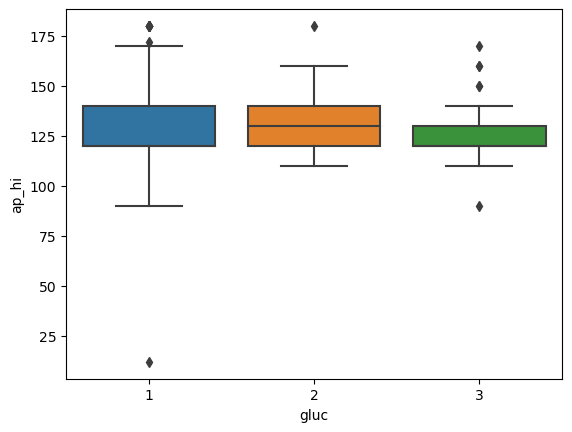

In [53]:
sns.boxplot(x="gluc", y="ap_hi",  data=df);

In [14]:
# Ho: All means are, equal.
# H1: At least one of the means are different.

⭐Show the descriptive statistics of 3 groups.

In [15]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,59479.0,127.982633,147.654515,-150.0,120.0,120.0,140.0,16020.0
2,5190.0,133.872832,179.965896,11.0,120.0,130.0,140.0,13010.0
3,5331.0,133.207841,191.407819,10.0,120.0,130.0,140.0,14020.0


⭐Conduct the relavant statistical test to see if there is a significant difference betweenthe groups.

In [16]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=5.836722951882409, pvalue=0.0029198112391350894)

In [17]:
# Large p value suggests us fail to reject Ho. All means are, equal.

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# compare the height between each diet, using 95% confidence interval 
mc = MultiComparison(df['ap_hi'], df['gluc'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique gluc groups: {}'.format(mc.groupsunique))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   5.8902 0.0224   0.666 11.1144   True
     1      3   5.2252 0.0464   0.065 10.3854   True
     2      3   -0.665 0.9733 -7.7034  6.3734  False
----------------------------------------------------
Unique gluc groups: [1 2 3]


In [19]:
# Fail to reject Ho. Means are same.

## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [20]:
# Ho: The two categorical variables are independent.
# H1: The two categorical variables are dependent.

In [54]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,55,60
1,197,176


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [27]:
chi, p, dof, expctd = stats.chi2_contingency(ct)
print("statistic:", chi)
print("p value:", p)

statistic: 3423.4388976841265
p value: 0.0


In [23]:
print('stat=%.3f, p=%.4f' % (chi, p))
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. The two categorical variables are dependent')

stat=88.801, p=0.0000
We reject the null hypothesis. The two categorical variables are dependent


⭐Conduct chi-square test to see if there is a relationship between Cholesterol and cardio

In [24]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


In [25]:
chi, p, dof, expctd = stats.chi2_contingency(ct)
print("statistic:", chi)
print("p value:", p)

statistic: 3423.4388976841265
p value: 0.0


In [26]:
print('stat=%.3f, p=%.4f' % (chi, p))
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. The two categorical variables are dependent')

stat=3423.439, p=0.0000
We reject the null hypothesis. The two categorical variables are dependent
